In [ ]:
# ! pip install -q kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import os
# os.environ['username'] = 'rekhalodhi' # username from the json file
# os.environ['key'] = 'b3a5d08ff70b9f6c085a23d12bc9b1a0' # key from the json file

In [ ]:
# !kaggle datasets download -d wordsforthewise/lending-club

 98% 1.24G/1.26G [00:10<00:00, 139MB/s]
100% 1.26G/1.26G [00:10<00:00, 124MB/s]


In [2]:
pwd

'/content'

In [3]:
!ls

drive  sample_data


In [4]:
%cd /content/drive/MyDrive/major_project

/content/drive/MyDrive/major_project


In [ ]:
pwd

'/content/drive/MyDrive/major_project'

In [ ]:
!ls

'accepted_2007_to_2018Q4 (Debashis Saha).pdf'
 Accepted_Dataset_NB.ipynb
 clean_accepted.csv
 data
 Lending_club.ipynb
 LICENSE
'loans_(2).ipynb'
'Main_Pro_EDA (1).ipynb'
 major_project.ipynb
 manasa_main_project.ipynb
'Optimizing_LendingClub’s_Financial_Risk (4).ipynb'
'PredictLoan(1).ipynb'
 PredictLoan.ipynb
 README.md
 Untitled2.ipynb


In [ ]:
# !unzip '/content/lending-club.zip' -d '/content/drive/MyDrive/major_project/data/'

In [5]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
accepted_file_path = r'/content/drive/MyDrive/major_project/data/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv'
rejected_file_path = r'/content/drive/MyDrive/major_project/data/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv'

In [7]:
df_accepted = pd.read_csv(accepted_file_path, low_memory = True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_copy = df_accepted.copy(deep = True)

In [ ]:
df_rejected = pd.read_csv(rejected_file_path)

In [ ]:
df_accepted.shape

(2260701, 151)

In [8]:
pd.set_option('display.max_rows',151)
pd.set_option('display.max_columns',151)

In [ ]:
df_accepted.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
df_accepted['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [ ]:
df_accepted['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: loan_status, dtype: int64

In [ ]:
per_loan_status = (df_accepted['loan_status'].value_counts()/df_accepted.shape[0])*100

In [ ]:
per_loan_status

Fully Paid                                             47.629076
Current                                                38.851533
Charged Off                                            11.879457
Late (31-120 days)                                      0.949573
In Grace Period                                         0.373159
Late (16-30 days)                                       0.192374
Does not meet the credit policy. Status:Fully Paid      0.087937
Does not meet the credit policy. Status:Charged Off     0.033662
Default                                                 0.001769
Name: loan_status, dtype: float64

In [9]:
df_accepted = df_accepted.loc[df_accepted['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default', 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off'])]

In [ ]:
df_accepted['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Charged Off                                             268559
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [ ]:
per_loan_status = (df_accepted['loan_status'].value_counts()/df_accepted.shape[0])*100
print("percentage of each laon status in loan status column.\n ")
per_loan_status

percentage of each laon status in loan status column.
 


Fully Paid                                             79.871805
Charged Off                                            19.921311
Does not meet the credit policy. Status:Fully Paid      0.147467
Does not meet the credit policy. Status:Charged Off     0.056450
Default                                                 0.002967
Name: loan_status, dtype: float64

In [ ]:
df_accepted.shape

(1348099, 151)

In [ ]:
len(list(df_accepted['title'].unique()))        #having large number of unique values

63153

In [ ]:
np.sort(df_accepted['purpose'].unique())

array(['car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding'], dtype=object)

In [ ]:
df_accepted['pymnt_plan'].unique()      #single value so will be dropped

array(['n'], dtype=object)

In [ ]:
np.sort(df_accepted['grade'].unique())

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [ ]:
df_accepted['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
np.sort(df_accepted['sub_grade'].unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [ ]:
df_accepted.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348099 entries, 0 to 2260697
Data columns (total 151 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   id                                          1348099 non-null  object 
 1   member_id                                   0 non-null        float64
 2   loan_amnt                                   1348099 non-null  float64
 3   funded_amnt                                 1348099 non-null  float64
 4   funded_amnt_inv                             1348099 non-null  float64
 5   term                                        1348099 non-null  object 
 6   int_rate                                    1348099 non-null  float64
 7   installment                                 1348099 non-null  float64
 8   grade                                       1348099 non-null  object 
 9   sub_grade                                   1348099 non-

In [ ]:
df_accepted.describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,1348099.0,14408.998913,8716.137925,5.000000e+02,7975.000000,12000.000,20000.000000,4.000000e+04
funded_amnt,1348099.0,14400.187004,8712.249793,5.000000e+02,7950.000000,12000.000,20000.000000,4.000000e+04
funded_amnt_inv,1348099.0,14372.530939,8718.353742,0.000000e+00,7800.000000,12000.000,20000.000000,4.000000e+04
int_rate,1348099.0,13.241562,4.765685,5.310000e+00,9.750000,12.740,15.990000,3.099000e+01
installment,1348099.0,437.777843,261.497190,4.930000e+00,248.280000,375.040,580.220000,1.719830e+03
annual_inc,1348095.0,76237.743295,69922.741975,0.000000e+00,45750.000000,65000.000,90000.000000,1.099920e+07
dti,1347725.0,18.274253,11.155495,-1.000000e+00,11.790000,17.610,24.050000,9.990000e+02
delinq_2yrs,1348070.0,0.317633,0.877744,0.000000e+00,0.000000,0.000,0.000000,3.900000e+01
fico_range_low,1348099.0,696.162233,31.850787,6.100000e+02,670.000000,690.000,710.000000,8.450000e+02


In [10]:
def null_values(df):
        '''This function will take the data frame and will return the 
        number of null values presend  and their percentage in all the columns with their respective names'''

        mis_val = df.isnull().sum()
        mis_val_percent = 100 * mis_val / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename( columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(2)
        print ('Dataframe has ' + str(df.shape[1]) + ' columns.\n'  'There are ' + str(mis_val_table_ren_columns.shape[0]) +  ' columns that have missing values.')
        return mis_val_table_ren_columns

In [11]:
miss_values_accepted = null_values(df_accepted)
miss_values_accepted.head()

Dataframe has 151 columns.
There are 113 columns that have missing values.


,Missing Values,% of Total Values
member_id,1348099,100.00
next_pymnt_d,1345310,99.79
orig_projected_additional_accrued_interest,1344338,99.72
hardship_status,1342343,99.57
hardship_length,1342343,99.57


In [12]:
df_accepted_dropped = df_accepted.drop(df_accepted.loc[:, df_accepted.isna().mean().sort_values() > 0.5].columns, axis=1)

In [13]:
df_accepted_dropped.shape

(1348099, 93)

In [ ]:
miss_values_accepted = null_values(df_accepted_dropped)
miss_values_accepted.head()

Dataframe has 93 columns.
There are 55 columns that have missing values.


,Missing Values,% of Total Values
mths_since_recent_inq,176822,13.12
num_tl_120dpd_2m,120152,8.91
mo_sin_old_il_acct,108325,8.04
emp_title,85950,6.38
emp_length,78550,5.83


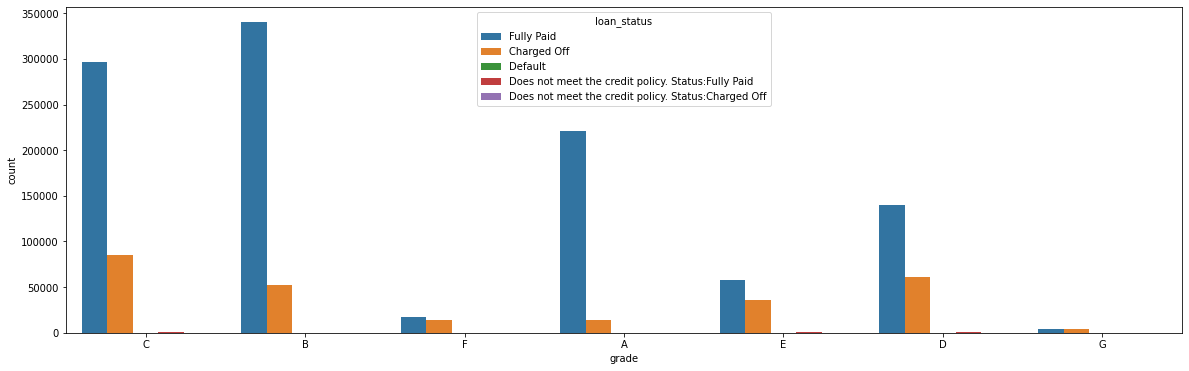

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'grade', hue = 'loan_status', data = df_accepted_dropped)

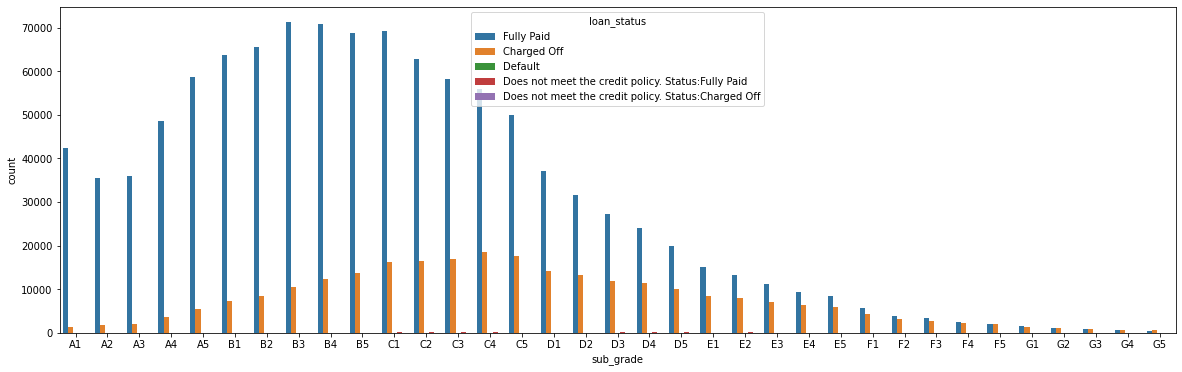

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'sub_grade', hue = 'loan_status', data = df_accepted_dropped, order = sorted(df_accepted_dropped['sub_grade'].unique()))

In [14]:
unneeded_columns = ['id', 'grade', 'emp_title', 'url', 'title', 'zip_code']

In [15]:
df_accepted_dropped = df_accepted_dropped.drop(unneeded_columns, axis=1)

In [ ]:
{column: list(df_accepted_dropped[column].unique()) for column in df_accepted_dropped if df_accepted_dropped.dtypes[column] == 'object'}

In [ ]:
df_accepted_dropped.shape

(1348099, 87)

In [16]:
df_accepted_dropped = df_accepted_dropped.drop(['hardship_flag', 'pymnt_plan'], axis=1)

In [ ]:
df_accepted_dropped.select_dtypes('object').head()

,term,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,disbursement_method,debt_settlement_flag
0,36 months,C4,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,debt_consolidation,PA,Aug-2003,w,Jan-2019,Mar-2019,Individual,Cash,N
1,36 months,C1,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,small_business,SD,Dec-1999,w,Jun-2016,Mar-2019,Individual,Cash,N
2,60 months,B4,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,home_improvement,IL,Aug-2000,w,Jun-2017,Mar-2019,Joint App,Cash,N
4,60 months,F1,3 years,MORTGAGE,Source Verified,Dec-2015,Fully Paid,major_purchase,PA,Jun-1998,w,Jul-2016,Mar-2018,Individual,Cash,N
5,36 months,C3,4 years,RENT,Source Verified,Dec-2015,Fully Paid,debt_consolidation,GA,Oct-1987,w,May-2017,May-2017,Individual,Cash,N


Check employement length and set values 0 for smaller than 1 emp_length and 11 for greater than 10 value

In [ ]:
df_accepted_dropped['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '7 years', '8 years',
       '2 years', '5 years', '9 years', '< 1 year', '1 year', nan],
      dtype=object)

In [17]:
df_accepted_dropped['emp_length'] = df_accepted_dropped['emp_length'].replace({'< 1 year': '0 years', '10+ years': '11 years'})

In [ ]:
df_accepted_dropped.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C4,11 years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C1,11 years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,Cash,N
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B4,11 years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,home_improvement,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,Cash,N
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F1,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,Cash,N
5,11950.0,11950.0,11950.0,36 months,13.44,405.18,C3,4 years,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,debt_consolidation,GA,10.20,0.0,Oct-1987,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0.0,0.0,0.0,May-2017,7653.56,May-2017,759.0,755.0,0.0,1.0,Individual,0.0,0.0,12798.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,NaN,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,Cash,N


In [ ]:
df_accepted_dropped.columns.sort_values()

Index(['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc',
       'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs',
       'delinq_amnt', 'disbursement_method', 'dti', 'earliest_cr_line',
       'emp_length', 'fico_range_high', 'fico_range_low', 'funded_amnt',
       'funded_amnt_inv', 'home_ownership', 'initial_list_status',
       'inq_last_6mths', 'installment', 'int_rate', 'issue_d',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_

In [ ]:
miss_values_accepted = null_values(df_accepted_dropped)
miss_values_accepted.head(52)

Dataframe has 85 columns.
There are 52 columns that have missing values.


,Missing Values,% of Total Values
mths_since_recent_inq,176822,13.12
num_tl_120dpd_2m,120152,8.91
mo_sin_old_il_acct,108325,8.04
emp_length,78550,5.83
pct_tl_nvr_dlq,70430,5.22
avg_cur_bal,70298,5.21
num_rev_accts,70277,5.21
mo_sin_rcnt_rev_tl_op,70277,5.21
mo_sin_old_rev_tl_op,70277,5.21
num_rev_tl_bal_gt_0,70276,5.21


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


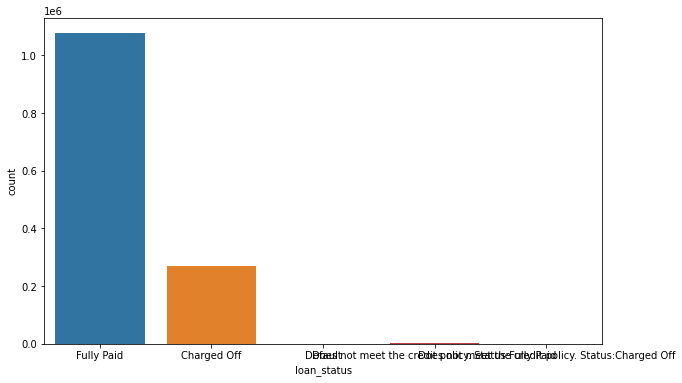

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(df_accepted_dropped.loan_status)

In [18]:
keep_list = ['annual_inc','avg_cur_bal', 'dti', 'emp_length','fico_range_low', 'sub_grade', 'home_ownership', 'initial_list_status',
       'installment', 'int_rate', 'loan_amnt', 'loan_status', 'mort_acc', 'pub_rec', 'purpose', 'revol_util', 'term', 'verification_status']

In [ ]:
len(keep_list)

18

In [19]:
drop_list = [col for col in df_accepted_dropped.columns if col not in keep_list]
print(drop_list)

['funded_amnt', 'funded_amnt_inv', 'issue_d', 'addr_state', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'nu

In [20]:
df_accepted_dropped.drop(labels=drop_list, axis=1, inplace=True)

In [21]:
df_accepted_dropped.shape

(1348099, 18)

In [ ]:
df_accepted_dropped.columns.sort_values()

Index(['annual_inc', 'avg_cur_bal', 'dti', 'emp_length', 'fico_range_low',
       'home_ownership', 'initial_list_status', 'installment', 'int_rate',
       'loan_amnt', 'loan_status', 'mort_acc', 'pub_rec', 'purpose',
       'revol_util', 'sub_grade', 'term', 'verification_status'],
      dtype='object')

In [ ]:
{column: list(df_accepted_dropped[column].unique()) for column in df_accepted_dropped if df_accepted_dropped.dtypes[column] == 'object'}

{'emp_length': ['11 years',
  '3 years',
  '4 years',
  '6 years',
  '7 years',
  '8 years',
  '2 years',
  '5 years',
  '9 years',
  '0 years',
  '1 year',
  nan],
 'home_ownership': ['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'],
 'initial_list_status': ['w', 'f'],
 'loan_status': ['Fully Paid',
  'Charged Off',
  'Default',
  'Does not meet the credit policy. Status:Fully Paid',
  'Does not meet the credit policy. Status:Charged Off'],
 'purpose': ['debt_consolidation',
  'small_business',
  'home_improvement',
  'major_purchase',
  'credit_card',
  'other',
  'house',
  'vacation',
  'car',
  'medical',
  'moving',
  'renewable_energy',
  'wedding',
  'educational'],
 'sub_grade': ['C4',
  'C1',
  'B4',
  'F1',
  'C3',
  'B2',
  'B1',
  'A2',
  'B5',
  'C2',
  'E2',
  'A4',
  'E3',
  'C5',
  'A1',
  'D4',
  'F3',
  'D1',
  'B3',
  'D3',
  'D5',
  'A5',
  'F2',
  'E4',
  'D2',
  'E1',
  'F5',
  'E5',
  'A3',
  'G2',
  'G1',
  'G3',
  'G4',
  'F4',
  'G5'],
 'term': [' 36 months

# **Encoding categorical variables**

### With the help of OrdinalEncoder() and some lamda function techniques. 
Because Machine learning algorithms and deep learning neural networks require that input and output variables are numbers. This means that categorical data must be encoded to numbers before we can use it to fit and evaluate a model

In [40]:
#deep copy of the data created
df_copy1 = df_accepted_dropped.copy(deep= True) 

In [93]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348099 entries, 0 to 2260697
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   loan_amnt            1348099 non-null  float64
 1   term                 1348099 non-null  object 
 2   int_rate             1348099 non-null  float64
 3   installment          1348099 non-null  float64
 4   sub_grade            1348099 non-null  object 
 5   emp_length           1269549 non-null  object 
 6   home_ownership       1348099 non-null  object 
 7   annual_inc           1348099 non-null  float64
 8   verification_status  1348099 non-null  object 
 9   loan_status          1348099 non-null  object 
 10  purpose              1348099 non-null  object 
 11  dti                  1347725 non-null  float64
 12  fico_range_low       1348099 non-null  float64
 13  pub_rec              1348099 non-null  float64
 14  revol_util           1348099 non-null  float64
 15

In [94]:
sorted([column for column in df_accepted_dropped if df_accepted_dropped.dtypes[column] == 'object'])

['emp_length',
 'home_ownership',
 'initial_list_status',
 'loan_status',
 'purpose',
 'sub_grade',
 'term',
 'verification_status']

In [95]:
df_copy1['home_ownership'] = df_copy1['home_ownership'].replace(['ANY', 'NONE'], 'OTHER')   #replacing 'ANY','NONE' with the 'OTHER'
df_copy1['emp_length'] = df_copy1['emp_length'].fillna('0 year')                            #replacing 'nan values with the zero'

In [96]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()           #creating object for the ordinal encoder      

In [97]:
#employement length

df_copy1['emp_length'].unique()                                                            #find unique values in the emp_length column.

array(['11 years', '3 years', '4 years', '6 years', '7 years', '8 years',
       '2 years', '5 years', '9 years', '0 years', '1 year', '0 year'],
      dtype=object)

In [98]:
df_copy1['emp_length'] = df_copy1['emp_length'].apply(lambda s: int(s[0:2]))                #slicing and changing values to int
np.sort(df_copy1['emp_length'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11])

In [99]:
#home_ownership

np.sort(df_copy1['home_ownership'].unique()) 

array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object)

In [100]:
df_copy1['home_ownership'] = ord_enc.fit_transform(df_copy1[['home_ownership']])          #fitting and transforming 'home_ownership' column
np.sort(df_copy1['home_ownership'].unique())        

array([0., 1., 2., 3.])

In [101]:
#initial_list_status

in_ls = df_copy1['initial_list_status'].unique()
print(in_ls)


['w' 'f']


In [102]:
df_copy1['initial_list_status'] = ord_enc.fit_transform(df_copy1[['initial_list_status']])
df_copy1['initial_list_status'].unique()

array([1., 0.])

In [103]:
# loan_status

np.sort(df_copy1['loan_status'].unique())                    #find unique values in loan_status column

array(['Charged Off', 'Default',
       'Does not meet the credit policy. Status:Charged Off',
       'Does not meet the credit policy. Status:Fully Paid', 'Fully Paid'],
      dtype=object)

In [104]:
df_copy1['loan_status'] = ord_enc.fit_transform(df_copy1[['loan_status']])        #fit and transform data in laon status column
np.sort(df_copy1['loan_status'].unique())

array([0., 1., 2., 3., 4.])

In [105]:
#purpose

df_copy1['purpose'].unique()

array(['debt_consolidation', 'small_business', 'home_improvement',
       'major_purchase', 'credit_card', 'other', 'house', 'vacation',
       'car', 'medical', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [106]:
df_copy1['purpose'] = ord_enc.fit_transform(df_copy1[['purpose']])
df_copy1['purpose'].unique()

array([ 2., 11.,  4.,  6.,  1.,  9.,  5., 12.,  0.,  7.,  8., 10., 13.,
        3.])

In [107]:
#sub_grade

np.sort(df_copy1['sub_grade'].unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [108]:
df_copy1['sub_grade'] = ord_enc.fit_transform(df_copy1[['sub_grade']])
df_copy1['sub_grade'].unique()

array([13., 10.,  8., 25., 12.,  6.,  5.,  1.,  9., 11., 21.,  3., 22.,
       14.,  0., 18., 27., 15.,  7., 17., 19.,  4., 26., 23., 16., 20.,
       29., 24.,  2., 31., 30., 32., 33., 28., 34.])

In [109]:
#term

df_copy1['term'] = df_copy1['term'].apply(lambda s: s[0:3])                            #slicing values
df_copy1['term'] = ord_enc.fit_transform(df_copy1[['term']])                         #applying ordinal encoder and converting categorical(obj) --> int  
df_copy1['term'].unique()


array([0., 1.])

In [110]:
# verification_status

df_copy1['verification_status'] = ord_enc.fit_transform(df_copy1[['verification_status']])
df_copy1['verification_status'].unique()

array([0., 1., 2.])

In [111]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348099 entries, 0 to 2260697
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   loan_amnt            1348099 non-null  float64
 1   term                 1348099 non-null  float64
 2   int_rate             1348099 non-null  float64
 3   installment          1348099 non-null  float64
 4   sub_grade            1348099 non-null  float64
 5   emp_length           1348099 non-null  int64  
 6   home_ownership       1348099 non-null  float64
 7   annual_inc           1348099 non-null  float64
 8   verification_status  1348099 non-null  float64
 9   loan_status          1348099 non-null  float64
 10  purpose              1348099 non-null  float64
 11  dti                  1347725 non-null  float64
 12  fico_range_low       1348099 non-null  float64
 13  pub_rec              1348099 non-null  float64
 14  revol_util           1348099 non-null  float64
 15

# **Rejecting** **Outliers from the dataset**

### Here to remove outliers, I have used the IQR( Inter quartile range ) method, data visualization (distribution plot, bar plot). 

Most machine learning algorithms do not work well in the presence of outlier. So it is desirable to detect and remove outliers from the dataset. They can also impact the basic assumption of Regression and other statistical model assumptions.
With all these reasons we must be careful about outlier and treat them before build a statistical/machine learning model.

In [42]:
miss_values_accepted = null_values(df_copy1)
miss_values_accepted.head(6)

Dataframe has 18 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
emp_length,78550,5.83
avg_cur_bal,70298,5.21
mort_acc,50030,3.71
revol_util,897,0.07
dti,374,0.03
pub_rec,29,0.00


In [43]:
def reject_outliers(sr, iq_range=0.5, side='left', return_mask=False):
    '''
    Takes an array (or pandas series) and returns an array with outliers excluded, according to the
    interquartile range.
    
    Parameters:
    -----------
    sr: array
        array of numeric values
    iq_range: float
        percent to calculate quartiles by, 0.5 will yield 25% and 75%ile quartiles
    side: string
        if 'left', will return everything below the highest quartile
        if 'right', will return everything above the lowest quartile
        if 'both', will return everything between the high and low quartiles

        but in this case, as we want most of the time values only below the highest quartile so the side by default will remain 'left' 
    '''
    pcnt = (1 - iq_range) / 2
    qlow, median, qhigh = sr.dropna().quantile([pcnt, 0.50, 1-pcnt])
    
    iqr = qhigh - qlow
    print(qlow, median, qhigh, iqr)

    if side=='both':
        mask = (sr - median).abs() <= iqr
    elif side=='left':
        mask = (sr - median) <= iqr
    elif side=='right':
        mask = (sr - median) >= iqr
    else:
        print('options for side are left, right, or both')
    
    if return_mask:
        return mask
    
    return sr[mask]

In [44]:
def plot_feature(sr, iq_range, return_mask, side ='left'):
  '''Take an array call reject_outliers function and return an array '''

  no_outliers = reject_outliers(sr = sr, iq_range = iq_range, return_mask = return_mask, side = side)
  df_no_outlier =  sr.loc[no_outliers]              #create a dataset with no outliers to plot a distribution plot 
  sns.distplot(df_no_outlier, kde = False)
  return no_outliers


In [45]:
df_copy1.shape

(1348099, 18)

In [46]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348099 entries, 0 to 2260697
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   loan_amnt            1348099 non-null  float64
 1   term                 1348099 non-null  object 
 2   int_rate             1348099 non-null  float64
 3   installment          1348099 non-null  float64
 4   sub_grade            1348099 non-null  object 
 5   emp_length           1269549 non-null  object 
 6   home_ownership       1348099 non-null  object 
 7   annual_inc           1348095 non-null  float64
 8   verification_status  1348099 non-null  object 
 9   loan_status          1348099 non-null  object 
 10  purpose              1348099 non-null  object 
 11  dti                  1347725 non-null  float64
 12  fico_range_low       1348099 non-null  float64
 13  pub_rec              1348070 non-null  float64
 14  revol_util           1347202 non-null  float64
 15

In [47]:
df_copy1['dti'].median()

17.61

In [48]:
df_copy1.groupby(by = 'loan_status')['dti'].agg([np.mean, np.std])

,mean,std
loan_status,,
Charged Off,20.171196,11.831747
Default,17.263250,10.118348
Does not meet the credit policy. Status:Charged Off,14.343732,7.187256
Does not meet the credit policy. Status:Fully Paid,14.107173,7.400106
Fully Paid,17.811629,10.935927


In [49]:
df_copy1.groupby(by = 'dti')['annual_inc'].agg([np.mean, np.std])

,mean,std
dti,,
-1.00,84500.000000,1.343503e+04
0.00,61279.112463,6.543011e+04
0.01,579517.796667,1.707428e+06
0.02,499281.347826,1.919080e+06
0.03,893000.000000,2.156858e+06
...,...,...
831.97,2000.000000,NaN
879.55,1061.000000,NaN
886.77,1000.000000,NaN


In [50]:
df_copy1.groupby('loan_status')['dti'].agg([np.size])

,size
loan_status,
Charged Off,268559.0
Default,40.0
Does not meet the credit policy. Status:Charged Off,761.0
Does not meet the credit policy. Status:Fully Paid,1988.0
Fully Paid,1076751.0


In [52]:
df_copy1.groupby('loan_status')['dti'].agg([np.mean])

,mean
loan_status,
Charged Off,20.171196
Default,17.263250
Does not meet the credit policy. Status:Charged Off,14.343732
Does not meet the credit policy. Status:Fully Paid,14.107173
Fully Paid,17.811629


In [54]:
'''find indexes where the values are not in acceptable range and replace 
    with the calculated mean of acceptable range for fully paid loan status
'''

dti_fp = ((df_copy1['dti'] <=50 ) & (df_copy1['dti'] >= 0) ) & (df_copy1['loan_status'] == 'Fully Paid')
mean_fp = df_copy1[dti_fp].dti.mean() 
dti_fpnr = (df_copy1['loan_status'] == 'Fully Paid')  & ((df_copy1['dti'] >50 ) | (df_copy1['dti'] < 0) )  #find locations not having values in acceptable range

df_copy1.loc[dti_fpnr, 'dti'] = mean_fp                                                                     #replace the vale with in the range

In [55]:
'''find indexes where the values are not in acceptable range and replace 
    with the calculated mean of acceptable range for the charged off loan status'''


dti_cf = (df_copy1['loan_status'] == 'Charged Off') & ((df_copy1['dti'] >50 ) | (df_copy1['dti'] < 0) )
df_copy1.loc[dti_cf, 'dti'] =  df_copy1.loc[df_copy1['loan_status'] == 'Charged Off', 'dti'].mean()       #replace the vale with in the range


In [56]:
'''find indexes where the values are not in acceptable range and replace 
    with the calculated mean of acceptable range for the Default loan status'''

df_copy1.loc[df_copy1['loan_status'] == 'Default', 'dti'] =  df_copy1.loc[df_copy1['loan_status'] == 'Default', 'dti'].mean()       #replace the vale with in the range

In [57]:
'''find indexes where the values are not in acceptable range and replace 
    with the calculated mean of acceptable range for the Does not meet the credit policy. Status:Charged Off loan status'''

dti_mcf = (df_copy1['loan_status'] == 'Does not meet the credit policy. Status:Charged Off') & ((df_copy1['dti'] >50 ) | (df_copy1['dti'] < 0) )

df_copy1.loc[dti_mcf, 'dti'] =  df_copy1.loc[df_copy1['loan_status'] == 'Does not meet the credit policy. Status:Charged Off', 'dti'].mean()       #replace the vale with in the range

In [58]:
'''find indexes where the values are not in acceptable range and replace 
    with the calculated mean of acceptable range for Does not meet the credit policy. Status:Fully Paid loan status'''

dti_nmfp = (df_copy1['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid')  & ((df_copy1['dti'] >50 ) | (df_copy1['dti'] < 0) )  #find locations not having values in acceptable range
df_copy1.loc[dti_nmfp, 'dti'] = df_copy1.loc[df_copy1['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid', 'dti'].mean()

In [59]:
df_copy1.groupby('loan_status')['dti'].agg([np.size, np.mean])

,size,mean
loan_status,,
Charged Off,268559.0,19.940675
Default,40.0,17.263250
Does not meet the credit policy. Status:Charged Off,761.0,14.343732
Does not meet the credit policy. Status:Fully Paid,1988.0,14.107173
Fully Paid,1076751.0,17.650314


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


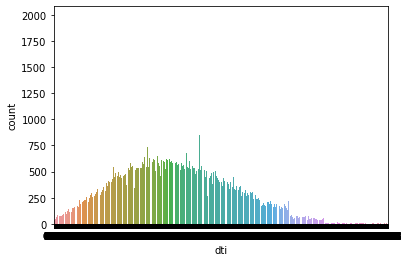

In [60]:
sns.countplot(df_copy1['dti'])

26000.0 65000.0 168075.3999999992 142075.3999999992


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


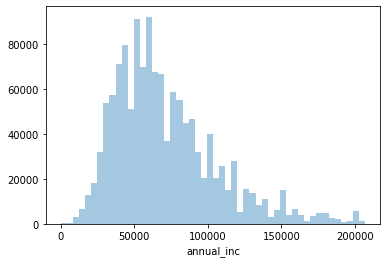

In [61]:
# annual income

df_copy1['annual_inc'] = df_copy1['annual_inc'].fillna(df_copy1['annual_inc'].median())

inc_no_outliers = plot_feature(df_copy1['annual_inc'], iq_range=0.92, return_mask = True)
df_copy1['annual_inc'] = df_copy1['annual_inc'].mask(inc_no_outliers == False)
df_copy1['annual_inc'] = df_copy1['annual_inc'].fillna(df_copy1['annual_inc'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


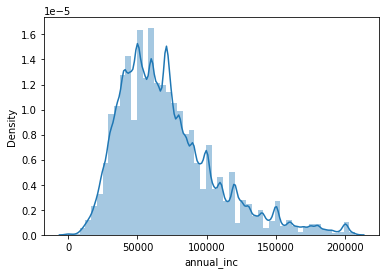

In [ ]:
sns.distplot(df_copy1['annual_inc'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


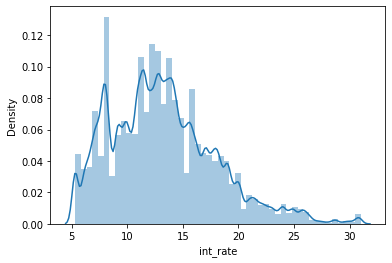

In [62]:
#No outliers found

sns.distplot(df_copy1['int_rate'])

In [63]:
df_copy1['int_rate'].max()

30.99

In [ ]:
df_copy1.groupby('loan_status')['int_rate'].agg([np.mean, np.min, np.max])

,mean,amin,amax
loan_status,,,
Charged Off,15.710714,5.31,30.99
Default,16.181750,5.32,30.74
Does not meet the credit policy. Status:Charged Off,14.597148,7.43,21.64
Does not meet the credit policy. Status:Fully Paid,13.978642,6.00,21.64
Fully Paid,12.623288,5.31,30.99


In [64]:
df_copy1[(df_copy1['annual_inc'] <= 26000.0)].groupby('loan_status')['int_rate'].agg([np.mean, np.min, np.max])

,mean,amin,amax
loan_status,,,
Charged Off,15.830862,5.31,30.99
Default,19.785000,14.08,25.49
Does not meet the credit policy. Status:Charged Off,13.190333,7.43,21.27
Does not meet the credit policy. Status:Fully Paid,13.385792,7.43,20.11
Fully Paid,13.920378,5.31,30.99


86.73 375.04 1085.48 998.75


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


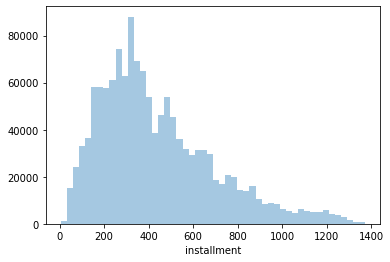

In [65]:
# installment

inst_no_outliers = plot_feature(df_copy1['installment'], iq_range=0.94, return_mask = True)
df_copy1['installment'] = df_copy1['installment'].mask(inst_no_outliers == False)
df_copy1['installment'] = df_copy1['installment'].fillna(df_copy1['installment'].mean())

In [66]:
df_copy1.groupby('loan_status')['installment'].agg([np.mean, np.min, np.max])

,mean,amin,amax
loan_status,,,
Charged Off,463.481298,21.62,1372.97
Default,438.939250,50.45,1328.39
Does not meet the credit policy. Status:Charged Off,305.158804,15.91,926.83
Does not meet the credit policy. Status:Fully Paid,287.069225,15.67,940.14
Fully Paid,430.662077,4.93,1373.22


In [67]:
df_copy1[(df_copy1['annual_inc'] >= 100000.0)].groupby(by = ['loan_status','term'])['installment'].agg([np.size, np.mean, np.min, np.max])

size  \
loan_status                                        term                   
Charged Off                                         36 months   21373.0   
                                                    60 months   19026.0   
Default                                             36 months       3.0   
                                                    60 months       2.0   
Does not meet the credit policy. Status:Charged...  36 months      86.0   
                                                    60 months      14.0   
Does not meet the credit policy. Status:Fully Paid  36 months     246.0   
                                                    60 months      39.0   
Fully Paid                                          36 months  156938.0   
                                                    60 months   53106.0   

                                                                     mean  \
loan_status                                        term                     
Charged Off                                         36 months  666.497322   
                                                    60 months  647.776873   
Default                                             36 months  191.200000   
                                                    60 months  808.330000   
Does not meet the credit policy. Status:Charged...  36 months  487.515465   
                                                    60 months  334.176429   
Does not meet the credit policy. Status:Fully Paid  36 months  433.805691   
                                                    60 months  368.917949   
Fully Paid                                          36 months  591.790692   
                                                    60 months  596.975981   

                                                                 amin     amax  
loan_status                                        term                         
Charged Off                                         36 months   32.24  1372.97  
                                                    60 months   57.19  1318.57  
Default                                             36 months   50.45   339.79  
                                                    60 months  669.98   946.68  
Does not meet the credit policy. Status:Charged...  36 months   30.02   926.83  
                                                    60 months  144.55   646.18  
Does not meet the credit policy. Status:Fully Paid  36 months   15.75   926.83  
                                                    60 months   56.26   685.37  
Fully Paid                                          36 months   30.12  1373.22  
                                                    60 months    4.93  1318.57

In [68]:
df_copy1[(df_copy1['annual_inc'] >= 100000.0)].groupby(by = ['loan_status','term'])['installment','loan_amnt', 'int_rate'].agg([np.median, np.mean])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


installment  \
                                                                   median   
loan_status                                        term                     
Charged Off                                         36 months     635.910   
                                                    60 months     637.380   
Default                                             36 months     183.360   
                                                    60 months     808.330   
Does not meet the credit policy. Status:Charged...  36 months     511.155   
                                                    60 months     323.990   
Does not meet the credit policy. Status:Fully Paid  36 months     383.380   
                                                    60 months     346.000   
Fully Paid                                          36 months     550.430   
                                                    60 months     578.420   

                                                                           \
                                                                     mean   
loan_status                                        term                     
Charged Off                                         36 months  666.497322   
                                                    60 months  647.776873   
Default                                             36 months  191.200000   
                                                    60 months  808.330000   
Does not meet the credit policy. Status:Charged...  36 months  487.515465   
                                                    60 months  334.176429   
Does not meet the credit policy. Status:Fully Paid  36 months  433.805691   
                                                    60 months  368.917949   
Fully Paid                                          36 months  591.790692   
                                                    60 months  596.975981   

                                                              loan_amnt  \
                                                                 median   
loan_status                                        term                   
Charged Off                                         36 months   20000.0   
                                                    60 months   25000.0   
Default                                             36 months    5000.0   
                                                    60 months   31900.0   
Does not meet the credit policy. Status:Charged...  36 months   15000.0   
                                                    60 months   15600.0   
Does not meet the credit policy. Status:Fully Paid  36 months   11875.0   
                                                    60 months   16000.0   
Fully Paid                                          36 months   17000.0   
                                                    60 months   24925.0   

                                                                             \
                                                                       mean   
loan_status                                        term                       
Charged Off                                         36 months  19880.478875   
                                                    60 months  25590.414433   
Default                                             36 months   5558.333333   
                                                    60 months  31900.000000   
Does not meet the credit policy. Status:Charged...  36 months  14119.186047   
                                                    60 months  15150.000000   
Does not meet the credit policy. Status:Fully Paid  36 months  12699.288618   
                                                    60 months  16189.743590   
Fully Paid                                          36 months  18187.219953   
                                                    60 months  24659.021109   

                                                      

In [69]:
df_copy1['installment'].max()

1373.22

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


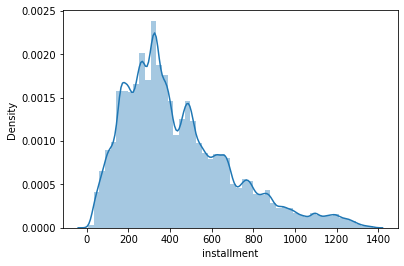

In [70]:
sns.distplot(df_copy1['installment'])

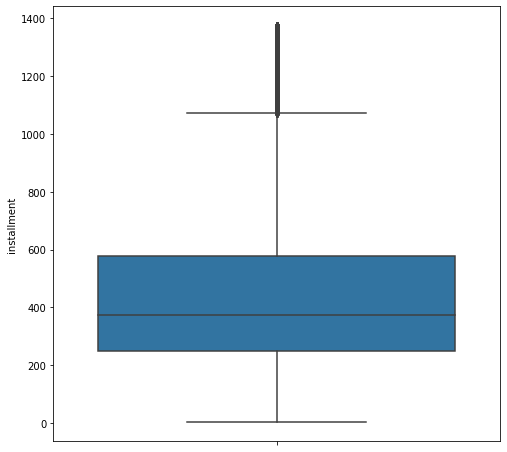

In [71]:
plt.figure(figsize=(8,8))
sns.boxplot( y=df_copy1['installment'] )

25.7 52.2 78.2 52.5


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


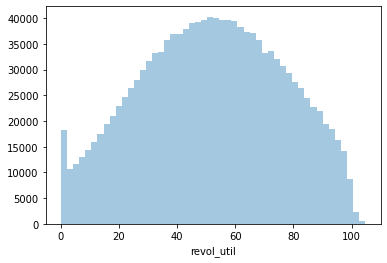

In [72]:
# revol_util

df_copy1['revol_util'] = df_copy1['revol_util'].fillna(df_copy1['revol_util'].median())
ru_no_outliers = plot_feature(df_copy1['revol_util'], iq_range=0.67, return_mask = True)
df_copy1['revol_util'] = df_copy1['revol_util'].mask(ru_no_outliers == False)
df_copy1['revol_util'] = df_copy1['revol_util'].fillna(df_copy1['revol_util'].mean())


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


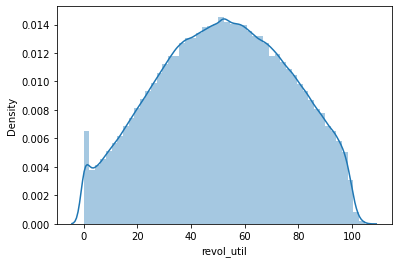

In [73]:
sns.distplot(df_copy1['revol_util'])

In [74]:
df_copy1['revol_util'].max()

104.7

In [75]:
df_copy1['pub_rec'].value_counts()

0.0     1119921
1.0      191035
2.0       24448
3.0        7403
4.0        2630
5.0        1267
6.0         636
7.0         283
8.0         160
9.0          83
10.0         57
11.0         40
12.0         27
13.0         18
15.0          9
21.0          6
18.0          6
14.0          5
16.0          5
19.0          5
17.0          3
28.0          3
20.0          3
49.0          2
24.0          2
22.0          2
86.0          1
25.0          1
63.0          1
61.0          1
54.0          1
23.0          1
47.0          1
46.0          1
40.0          1
37.0          1
34.0          1
Name: pub_rec, dtype: int64

0.0 0.0 86.0 86.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


'In case if there are outliers in this column'

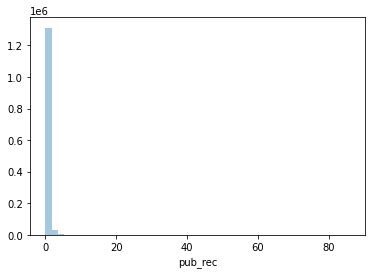

In [76]:
# pub_rec: just replaced nan vlues in this column

df_copy1['pub_rec'] = df_copy1['pub_rec'].fillna(df_copy1['pub_rec'].median())
pr_no_outliers = plot_feature(df_copy1['pub_rec'], iq_range=1, return_mask = True)

'''In case if there are outliers in this column'''
# df_copy['pub_rec'] = df_copy['pub_rec'].mask(pr_no_outliers == False)
# df_copy['pub_rec'] = df_copy['pub_rec'].mask(df_copy['pub_rec'].isna(), df_copy['pub_rec'].median())

In [112]:
df_copy1['pub_rec'].value_counts().sort_values(ascending=False)

0.0     1119950
1.0      191035
2.0       24448
3.0        7403
4.0        2630
5.0        1267
6.0         636
7.0         283
8.0         160
9.0          83
10.0         57
11.0         40
12.0         27
13.0         18
15.0          9
21.0          6
18.0          6
14.0          5
16.0          5
19.0          5
17.0          3
28.0          3
20.0          3
49.0          2
24.0          2
22.0          2
37.0          1
23.0          1
40.0          1
46.0          1
47.0          1
25.0          1
54.0          1
61.0          1
63.0          1
86.0          1
34.0          1
Name: pub_rec, dtype: int64

In [ ]:
df_copy1['avg_cur_bal'].max()

In [ ]:
df_copy1.groupby(by = ['loan_status','term'])['pub_rec'].agg([np.size, np.mean, np.median, np.min, np.max])

In [ ]:
df_copy1['avg_cur_bal'].value_counts().sample(31)

In [78]:
df_copy1.groupby(by = ['loan_status','term'])['loan_amnt', 'avg_cur_bal'].agg([np.size, np.mean, np.median, np.max])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


loan_amnt  \
                                                                   size   
loan_status                                        term                   
Charged Off                                         36 months  163252.0   
                                                    60 months  105307.0   
Default                                             36 months      25.0   
                                                    60 months      15.0   
Does not meet the credit policy. Status:Charged...  36 months     649.0   
                                                    60 months     112.0   
Does not meet the credit policy. Status:Fully Paid  36 months    1789.0   
                                                    60 months     199.0   
Fully Paid                                          36 months  857491.0   
                                                    60 months  219260.0   

                                                                             \
                                                                       mean   
loan_status                                        term                       
Charged Off                                         36 months  12601.646228   
                                                    60 months  20159.075608   
Default                                             36 months  11696.000000   
                                                    60 months  18775.000000   
Does not meet the credit policy. Status:Charged...  36 months   9388.790447   
                                                    60 months  10329.464286   
Does not meet the credit policy. Status:Fully Paid  36 months   8610.354947   
                                                    60 months  11036.683417   
Fully Paid                                          36 months  12537.370451   
                                                    60 months  20379.980389   

                                                                        \
                                                                median   
loan_status                                        term                  
Charged Off                                         36 months  10000.0   
                                                    60 months  19200.0   
Default                                             36 months   8400.0   
                                                    60 months  20000.0   
Does not meet the credit policy. Status:Charged...  36 months   7500.0   
                                                    60 months   8400.0   
Does not meet the credit policy. Status:Fully Paid  36 months   7000.0   
                                                    60 months   9700.0   
Fully Paid                                          36 months  10000.0   
                                                    60 months  20000.0   

                                                                        \
                                                                  amax   
loan_status                                        term                  
Charged Off                                         36 months  40000.0   
                                                    60 months  40000.0   
Default                                             36 months  40000.0   
                                                    60 months  35000.0   
Does not meet the credit policy. Status:Charged...  36 months  25000.0   
                                                    60 months  25000.0   
Does not meet the credit policy. Status:Fully Paid  36 months  25000.0   
                                                    60 months  25000.0   
Fully Paid                                          36 months  40000.0   
                                                    60 months  40000.0   

                                                              avg_cur_bal  \
                                                       

477.0 7407.0 72391.0 71914.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


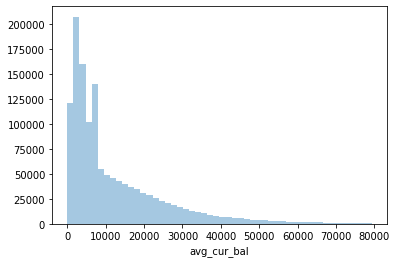

In [79]:
# avg_cur_bal

df_copy1['avg_cur_bal'] = df_copy1['avg_cur_bal'].fillna(df_copy1['avg_cur_bal'].median())
avgcb_no_outliers = plot_feature(df_copy1['avg_cur_bal'], iq_range=0.98, return_mask = True)
df_copy1['avg_cur_bal'] = df_copy1['avg_cur_bal'].mask(avgcb_no_outliers == False)
df_copy1['avg_cur_bal'] = df_copy1['avg_cur_bal'].fillna(df_copy1['avg_cur_bal'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


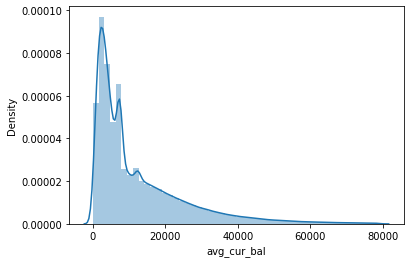

In [80]:
sns.distplot(df_copy1['avg_cur_bal'])

In [81]:
np.sort(df_copy1['mort_acc'].unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 34., 35., 36., 37., 47., 51.,
       nan])

In [82]:
df_copy1.groupby(by = ['loan_status','term'])['loan_amnt', 'mort_acc'].agg([np.size, np.mean, np.median, np.max])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


loan_amnt  \
                                                                   size   
loan_status                                        term                   
Charged Off                                         36 months  163252.0   
                                                    60 months  105307.0   
Default                                             36 months      25.0   
                                                    60 months      15.0   
Does not meet the credit policy. Status:Charged...  36 months     649.0   
                                                    60 months     112.0   
Does not meet the credit policy. Status:Fully Paid  36 months    1789.0   
                                                    60 months     199.0   
Fully Paid                                          36 months  857491.0   
                                                    60 months  219260.0   

                                                                             \
                                                                       mean   
loan_status                                        term                       
Charged Off                                         36 months  12601.646228   
                                                    60 months  20159.075608   
Default                                             36 months  11696.000000   
                                                    60 months  18775.000000   
Does not meet the credit policy. Status:Charged...  36 months   9388.790447   
                                                    60 months  10329.464286   
Does not meet the credit policy. Status:Fully Paid  36 months   8610.354947   
                                                    60 months  11036.683417   
Fully Paid                                          36 months  12537.370451   
                                                    60 months  20379.980389   

                                                                        \
                                                                median   
loan_status                                        term                  
Charged Off                                         36 months  10000.0   
                                                    60 months  19200.0   
Default                                             36 months   8400.0   
                                                    60 months  20000.0   
Does not meet the credit policy. Status:Charged...  36 months   7500.0   
                                                    60 months   8400.0   
Does not meet the credit policy. Status:Fully Paid  36 months   7000.0   
                                                    60 months   9700.0   
Fully Paid                                          36 months  10000.0   
                                                    60 months  20000.0   

                                                                        \
                                                                  amax   
loan_status                                        term                  
Charged Off                                         36 months  40000.0   
                                                    60 months  40000.0   
Default                                             36 months  40000.0   
                                                    60 months  35000.0   
Does not meet the credit policy. Status:Charged...  36 months  25000.0   
                                                    60 months  25000.0   
Does not meet the credit policy. Status:Fully Paid  36 months  25000.0   
                                                    60 months  25000.0   
Fully Paid                                          36 months  40000.0   
                                                    60 months  40000.0   

                                                               mort_acc  \
                                                         

0.0 1.0 7.0 7.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


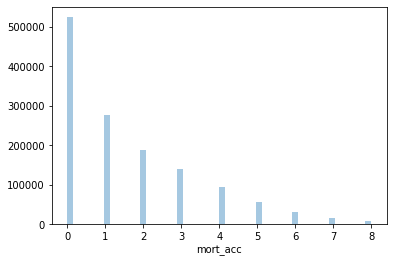

In [83]:
# mort_acc
df_copy1['mort_acc'] = df_copy1['mort_acc'].fillna(df_copy1['mort_acc'].median())
ma_no_outliers = plot_feature(df_copy1['mort_acc'], iq_range=0.97, return_mask = True)
df_copy1['mort_acc'] = df_copy1['mort_acc'].mask(ma_no_outliers == False)
df_copy1['mort_acc'] = df_copy1['mort_acc'].fillna(df_copy1['mort_acc'].mean())


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


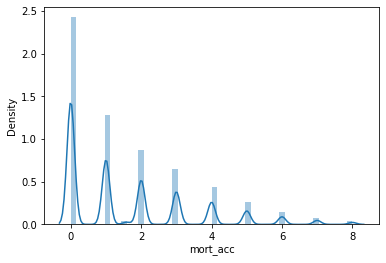

In [84]:
sns.distplot(df_copy1['mort_acc'])

In [85]:
df_copy1.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'fico_range_low', 'pub_rec',
       'revol_util', 'initial_list_status', 'avg_cur_bal', 'mort_acc'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


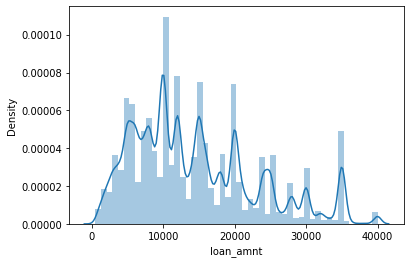

In [86]:
# loan_amount
'''Its look like there is no outliers in this column '''

sns.distplot(df_copy1['loan_amnt'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


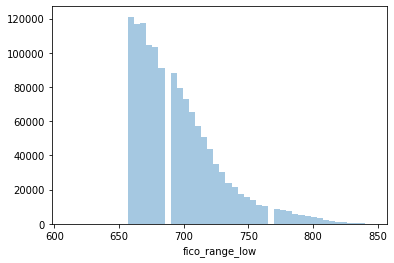

In [87]:
#fico_range_low
'''No outliers'''
sns.distplot(df_copy1['fico_range_low'], kde = False)

In [88]:
df_copy1['fico_range_low'].min()

610.0

In [89]:
df_copy1['fico_range_low'].max()

845.0

In [117]:
#save cleaned data to working directory
df_copy1.to_csv('clean_accepted.csv') 

In [113]:
corr_mat = df_copy1.corr()

In [114]:
corr_mat

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,fico_range_low,pub_rec,revol_util,initial_list_status,avg_cur_bal,mort_acc
loan_amnt,1.000000,0.380793,0.141432,0.950821,0.145088,0.112555,-0.181240,0.454176,0.224176,-0.065173,-0.154031,0.030016,0.101525,-0.065601,0.108446,0.066265,0.233847,0.223631
term,0.380793,1.000000,0.416939,0.145656,0.432513,0.068600,-0.101799,0.103484,0.128820,-0.175801,-0.052633,0.070858,-0.001898,-0.019507,0.063894,0.102455,0.090414,0.102354
int_rate,0.141432,0.416939,1.000000,0.147923,0.975539,-0.006079,0.070226,-0.104880,0.255657,-0.258811,0.113070,0.182450,-0.405484,0.052974,0.242926,-0.121431,-0.083172,-0.083491
installment,0.950821,0.145656,0.147923,1.000000,0.143610,0.098504,-0.150689,0.431453,0.225795,-0.050100,-0.141101,0.034327,0.051949,-0.054293,0.127335,0.022865,0.204123,0.191012
sub_grade,0.145088,0.432513,0.975539,0.143610,1.000000,-0.008081,0.074441,-0.105593,0.257422,-0.267255,0.118851,0.190946,-0.424400,0.060570,0.250204,-0.102819,-0.088722,-0.085426
emp_length,0.112555,0.068600,-0.006079,0.098504,-0.008081,1.000000,-0.182197,0.161649,-0.017170,0.028392,-0.013064,0.021238,0.014932,0.014321,0.046638,0.014109,0.111512,0.178189
home_ownership,-0.181240,-0.101799,0.070226,-0.150689,0.074441,-0.182197,1.000000,-0.234175,-0.006703,-0.070615,0.032033,-0.007748,-0.107046,0.005723,-0.020295,-0.034710,-0.493499,-0.503833
annual_inc,0.454176,0.103484,-0.104880,0.431453,-0.105593,0.161649,-0.234175,1.000000,0.029450,0.061626,-0.008717,-0.191219,0.094082,-0.015676,0.061376,0.064322,0.364897,0.309521
verification_status,0.224176,0.128820,0.255657,0.225795,0.257422,-0.017170,-0.006703,0.029450,1.000000,-0.089169,0.022455,0.098403,-0.130683,0.034848,0.116876,-0.049737,0.022132,0.031219
loan_status,-0.065173,-0.175801,-0.258811,-0.050100,-0.267255,0.028392,-0.070615,0.061626,-0.089169,1.000000,-0.020498,-0.107900,0.130786,-0.026081,-0.059848,-0.006567,0.077183,0.072507


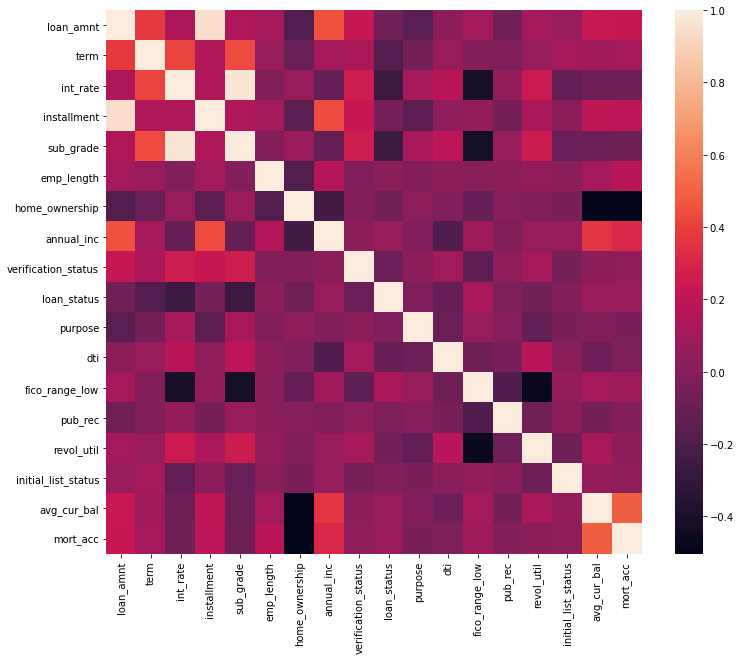

In [115]:
plt.figure(figsize = (12,10))
sns.heatmap(corr_mat)

## **Rejected file**

### Eda for rejected file

In [ ]:
# arr = pd.DataFrame(np.array([[1,2,3],[3,4,5],[4,5,6]]), columns = ['a', 'b', 'c'])

In [ ]:
# arr

In [ ]:
# arr['extra'] = np.zeros(3)

In [ ]:
# arr

In [ ]:
df_rejected.shape

(27648741, 9)

In [ ]:
df_rejected.head(35)

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0
5,15000.0,2007-05-27,Trinfiniti,645.0,0%,105xx,NY,3 years,0.0
6,10000.0,2007-05-27,NOTIFYi Inc,693.0,10%,210xx,MD,< 1 year,0.0
7,3900.0,2007-05-27,For Justin.,700.0,10%,469xx,IN,2 years,0.0
8,3000.0,2007-05-28,title?,694.0,10%,808xx,CO,4 years,0.0
9,2500.0,2007-05-28,timgerst,573.0,11.76%,407xx,KY,4 years,0.0


In [ ]:
df_rejected.columns

Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')

In [ ]:
df_rejected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


In [ ]:
miss_values_rejected = null_values(df_rejected)
miss_values_rejected.head(6)

Dataframe has 9 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Risk_Score,18497630,66.90
Employment Length,951355,3.44
Loan Title,1303,0.00
Policy Code,918,0.00
Zip Code,293,0.00
State,22,0.00


In [ ]:
df_rejected = df_rejected.dropna()

In [ ]:
df_rejected['Amount Requested'].sample(11)

22167615    35000.0
3866841     12000.0
288945      15000.0
21067673     5000.0
27197493     3000.0
7369639      6000.0
9214211      4500.0
23983494    20000.0
84712       25000.0
20177575     8000.0
9390764     25000.0
Name: Amount Requested, dtype: float64

In [ ]:
df_rejected['Loan Title'].unique()        #find the unique values in loan title column

array(['Wedding Covered but No Honeymoon', 'Consolidating Debt',
       'Want to consolidate my debt', ..., 'thad31', 'dougie03', 'freeup'],
      dtype=object)

In [ ]:
df_rejected['Loan Title'].nunique()       #find the number of unique values in loan title column

66538

In [ ]:
copy_r = df_rejected.copy(deep = True)

In [ ]:
copy_r['Loan Title'].value_counts().sample(15)

peer to peer loan                           1
Consolidatetoeaseburden                     1
Freedom from 7 seperate bills, HOPE!        1
Loan Home                                   1
debt consoladatation                        1
Credit Card Debt Reduction                  5
paycreditcard                               3
Help me expand my growing Ebay Business!    1
To pay-off credit cards                     1
Trying to straighten out credit issues      1
First Months Rent                           1
Debt Consolidation and Vehicle Purchase     1
Sam's Italy Trip                            1
Wedding Funding                             1
Hope's New Car                              1
Name: Loan Title, dtype: int64

In [ ]:
copy_r['Loan Title'] = copy_r['Loan Title'].str.lower()     #convert the values into lower case in loan title column

In [ ]:
def refine_title(df):
  '''
  find the keywords in loan title column and replace it with the appropriate key value which are accepted_purposes
  '''
  
  accepted_purpose = {'car': ['car'], 'credit_card': ['credit', 'card'], 'debt_consolidation': ['debt'], 'educational': ['educational', 'college', 'student'], 
                      'home_improvement': ['home improvement'], 'major_purchase': ['major purchase'], 'medical': ['medical'], 'moving': ['moving'], 
                      'other': ['other'], 'renewable_energy': ['renewable energy', 'renewable', 'energy'], 'small_business': ['small business'],'wedding': ['wedding']}


  for key, values in accepted_purpose.items():
    if len(values)==1:
      p = df['Loan Title'].str.contains(values[0])
      df.loc[p,'Loan Title']= key
      
    else:
      for value in values:
         p = df['Loan Title'].str.contains(value)
         df.loc[p,'Loan Title']= key
      

    # print(f'key: {key}, value: {values}')  
    # print(p.value_counts())
    # print('\n')
    
  return df


In [ ]:
copy_r = refine_title(copy_r)

In [ ]:
v = ['car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding'] 

In [ ]:
count = 0
for i in v:
  result = copy_r['Loan Title'] == i
  count = result.sum() + count
  print(f'{i}: {result.sum()}')
print(f'complete count: {count}')

car: 1604429
credit_card: 2302
debt_consolidation: 4166699
educational: 5791
home_improvement: 407858
house: 55008
major_purchase: 258311
medical: 275380
moving: 254633
other: 1377331
renewable_energy: 10470
small_business: 134102
vacation: 100737
wedding: 18993
complete count: 8672044


In [ ]:
len(v)

14

In [ ]:
location_acc = (copy_r['Loan Title'] == v[0]) | (copy_r['Loan Title'] == v[1]) | (copy_r['Loan Title'] == v[2]) | (copy_r['Loan Title'] == v[3]) | (copy_r['Loan Title'] == v[4]) | (copy_r['Loan Title'] == v[5]) | (copy_r['Loan Title'] == v[6]) | (copy_r['Loan Title'] == v[7]) | (copy_r['Loan Title'] == v[8]) | (copy_r['Loan Title'] == v[9]) | (copy_r['Loan Title'] == v[10]) | (copy_r['Loan Title'] == v[11]) | (copy_r['Loan Title'] == v[12]) | (copy_r['Loan Title'] == v[13])

In [ ]:
location_acc.sum()

8672044

In [ ]:
location_acc.value_counts()

True     8672044
False     320151
Name: Loan Title, dtype: int64

In [ ]:
copy_r.loc[location_acc == False, 'Loan Title'] = np.nan

In [ ]:
copy_r = copy_r.dropna()

In [ ]:
copy_r.shape

(8672044, 9)

In [ ]:
copy_r['Loan Title'].value_counts()

debt_consolidation    4166699
car                   1604429
other                 1377331
home_improvement       407858
medical                275380
major_purchase         258311
moving                 254633
small_business         134102
vacation               100737
house                   55008
wedding                 18993
renewable_energy        10470
educational              5791
credit_card              2302
Name: Loan Title, dtype: int64

In [ ]:
copy_r['Loan Title'].nunique()

14

In [ ]:
miss_values_rejected = null_values(copy_r)
miss_values_rejected.head(6)

Dataframe has 9 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
copy_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8672044 entries, 0 to 27648738
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 661.6+ MB


In [ ]:
copy_r = copy_r.drop(copy_r.loc[:, ['Application Date','Zip Code', 'State', 'Policy Code']].columns, axis=1)

In [ ]:
copy_r.shape

(8672044, 5)

In [ ]:
# 'Amount Requested', 'Loan Title', 'Risk_Score', 'Debt-To-Income Ratio', 'Employment Length'.

copy_r = copy_r.rename(columns={'Loan Title': "purpose", 'Debt-To-Income Ratio': "dti", 'Employment Length': 'emp_length'})

In [ ]:
copy_r.columns

Index(['Amount Requested', 'purpose', 'Risk_Score', 'dti', 'emp_length'], dtype='object')

In [ ]:
copy_r['emp_length'].unique()

array(['4 years', '< 1 year', '1 year', '2 years', '7 years', '3 years',
       '5 years', '10+ years', '6 years', '9 years', '8 years'],
      dtype=object)

In [ ]:
copy_r['emp_length'] = copy_r['emp_length'].replace({'< 1 year': '0 years', '10+ years': '11 years'})

In [ ]:
np.sort(copy_r['emp_length'].unique())

array(['0 years', '1 year', '11 years', '2 years', '3 years', '4 years',
       '5 years', '6 years', '7 years', '8 years', '9 years'],
      dtype=object)

In [ ]:
copy_r['emp_length'] = copy_r['emp_length'].apply(lambda s: int(s[0:2]))                #slicing and changing values to int
np.sort(copy_r['emp_length'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11])

In [ ]:
copy_r['dti'].max()

'99999%'

In [ ]:
copy_r['dti'].min()

'-1%'

In [ ]:
# s = '15.5%'
# s = float(''.join(list(s)[:-1]))
# s

15.5

In [ ]:
copy_r['dti'] = copy_r['dti'].apply(lambda s: float(''.join(list(s)[:-1])))

In [ ]:
copy_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8672044 entries, 0 to 27648738
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Amount Requested  float64
 1   purpose           object 
 2   Risk_Score        float64
 3   dti               float64
 4   emp_length        int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 397.0+ MB


In [ ]:
copy_r.loc[copy_r['dti'] >100, 'dti'].shape

(273994,)

In [ ]:
copy_r.shape

(8672044, 5)

In [ ]:
# r = pd.DataFrame(np.array([[1,2,3],[1,1,3],[4,5,6], [3,7,9]]), columns = ['a','b','c'])
# r

In [ ]:
# r.drop(r[r['b']>1].index, inplace= True, axis = 0)

In [ ]:
# r

In [ ]:
copy_r.drop(copy_r[(copy_r['dti'] > 100) | (copy_r['dti'] < 0)].index, inplace = True, axis=0)

In [ ]:
copy_r['dti'].value_counts()

0.00      410770
100.00    157090
1.20       11527
1.00        9923
1.50        9540
           ...  
99.39         12
99.59         11
98.79          9
99.99          6
99.19          5
Name: dti, Length: 10001, dtype: int64

In [ ]:
copy_r['dti'].max()

100.0

In [ ]:
copy_r.shape

(8382807, 5)

In [ ]:
copy_r['dti'].min()

0.0

In [ ]:
copy_r['dti'].nunique()

10001

In [ ]:
copy_r.columns

Index(['Amount Requested', 'purpose', 'Risk_Score', 'dti', 'emp_length'], dtype='object')

In [ ]:
copy_r['Risk_Score'].describe()

count    8.382807e+06
mean     6.270450e+02
std      8.876724e+01
min      0.000000e+00
25%      5.910000e+02
50%      6.360000e+02
75%      6.730000e+02
max      9.900000e+02
Name: Risk_Score, dtype: float64

In [ ]:
copy_r['Risk_Score'].sample(11)

12867679    648.0
7503336       0.0
22003493    511.0
21199764    626.0
21251922    646.0
7772348     622.0
8348674     569.0
9225789     741.0
27184601    631.0
13342110    661.0
26933616    606.0
Name: Risk_Score, dtype: float64

In [ ]:
copy_r['Risk_Score'].min()

0.0

In [ ]:
copy_r['Risk_Score'].max()

990.0

In [ ]:
copy_r['Amount Requested'].max()

1400000.0

In [ ]:
copy_r['Amount Requested'].min()

150.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


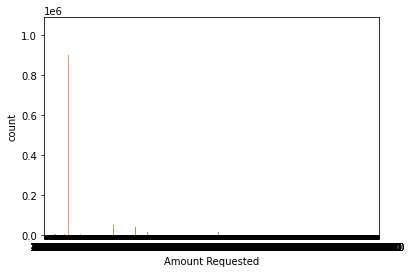

In [ ]:
ax = sns.countplot(copy_r['Amount Requested'])

In [ ]:
copy_r['Amount Requested'].describe()

count    8.382807e+06
mean     1.252910e+04
std      1.079598e+04
min      1.500000e+02
25%      4.000000e+03
50%      1.000000e+04
75%      2.000000e+04
max      1.400000e+06
Name: Amount Requested, dtype: float64

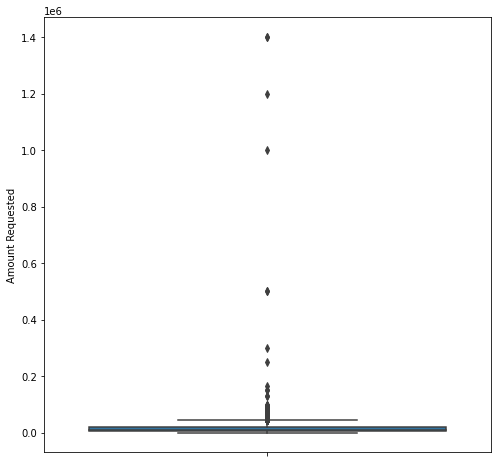

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot( y=copy_r['Amount Requested'] )

In [ ]:
ax = sns.boxplot(x="emp_length", y="Risk_Score",
                 data=copy_r, palette="Set3")

1200.0 10000.0 35000.0 33800.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


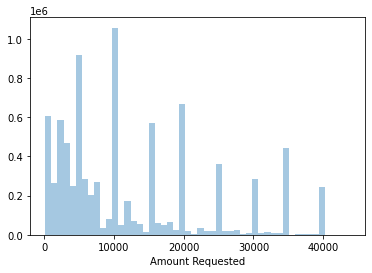

In [ ]:
# Amount Requested

avgcb_no_outliers = plot_feature(copy_r['Amount Requested'] , iq_range=.85, return_mask = True)
copy_r['Amount Requested']  = copy_r['Amount Requested'] .mask(avgcb_no_outliers == False)
copy_r['Amount Requested'] = copy_r['Amount Requested'].fillna(copy_r['Amount Requested'].mean())

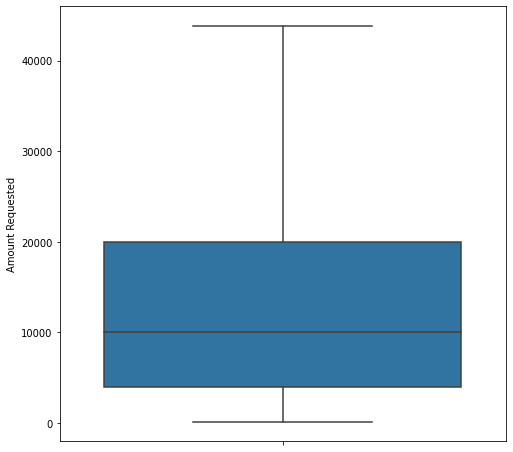

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot( y=copy_r['Amount Requested'] )

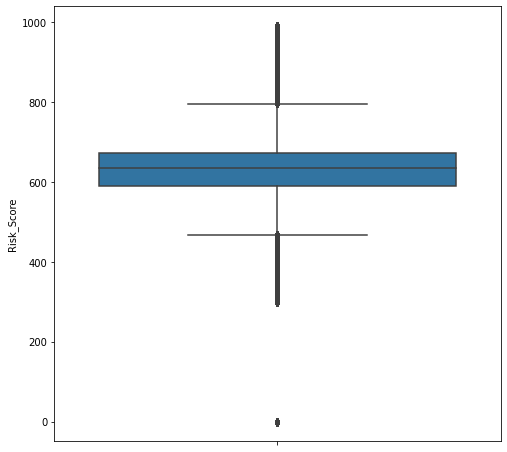

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot( y=copy_r['Risk_Score'] )

In [ ]:
copy_r[copy_r['Risk_Score']>900].shape

(5083, 5)

In [ ]:
copy_r[copy_r['Risk_Score']<1].shape

(78761, 5)

In [ ]:
copy_r.drop(copy_r[(copy_r['Risk_Score']<1) |(copy_r['Risk_Score']>900)].index, inplace = True, axis=0)   #ranges from 300 to 900

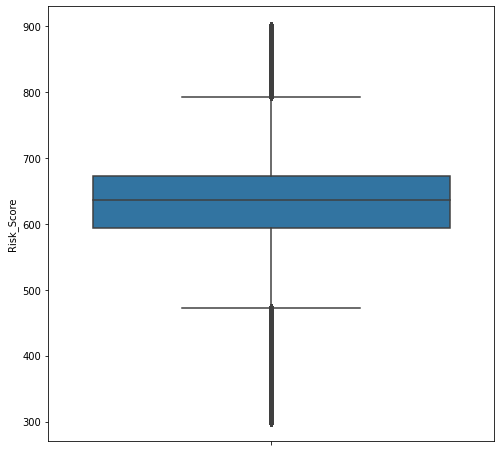

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot( y=copy_r['Risk_Score'] )

In [ ]:
copy_r.shape

(8298963, 5)

In [ ]:
copy_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8298963 entries, 0 to 27648738
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Amount Requested  float64
 1   purpose           object 
 2   Risk_Score        float64
 3   dti               float64
 4   emp_length        int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 379.9+ MB


In [ ]:
copy_r['purpose'].unique()

array(['wedding', 'debt_consolidation', 'moving', 'educational',
       'credit_card', 'car', 'medical', 'home_improvement', 'other',
       'renewable_energy', 'small_business', 'major_purchase', 'vacation',
       'house'], dtype=object)

In [ ]:
copy_r['purpose'] = ord_enc.fit_transform(copy_r[['purpose']])
copy_r['purpose'].unique()

array([13.,  2.,  8.,  3.,  1.,  0.,  7.,  4.,  9., 10., 11.,  6., 12.,
        5.])

In [ ]:
copy_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8298963 entries, 0 to 27648738
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Amount Requested  float64
 1   purpose           float64
 2   Risk_Score        float64
 3   dti               float64
 4   emp_length        int64  
dtypes: float64(4), int64(1)
memory usage: 379.9 MB


In [ ]:
#save cleaned data to working directory
copy_r.to_csv('clean_rejected.csv')